## Notebook for the smc sampler
We first define the target distribution and specify the parameters of the algorithm

In [2]:
# Notebook for smc sampler 
from __future__ import print_function
from __future__ import division

import numpy as np
import sys
sys.path.append("/home/alex/python_programming/help_functions")
sys.path.append("/home/alex/Dropbox/smc_hmc/python_smchmc")
from smc_sampler_functions.functions_smc_help import sequence_distributions


# define the parameters
dim = 5
N_particles = 2**10
T_time = 50
move_steps = 10
ESStarget = 0.95
#rs = np.random.seed(1)
targetmean = np.ones(dim)*8
targetvariance = np.eye(dim)*0.1
targetvariance_inv = np.linalg.inv(targetvariance)
l_targetvariance_inv = np.linalg.cholesky(targetvariance_inv)
parameters = {'dim' : dim, 
              'N_particles' : N_particles, 
              'targetmean': targetmean, 
              'targetvariance':targetvariance,
              'targetvariance_inv':targetvariance_inv,
              'l_targetvariance_inv':l_targetvariance_inv,
              'df' : 5,
              'T_time' : T_time,
              'autotempering' : True,
              'move_steps': move_steps,
              'ESStarget': ESStarget,
              'adaptive_covariance' : True
             }


# define the target distributions
from smc_sampler_functions.target_distributions import priorlogdens, priorgradlogdens
from smc_sampler_functions.target_distributions import targetlogdens_normal, targetgradlogdens_normal
from smc_sampler_functions.target_distributions import targetlogdens_student, targetgradlogdens_student

priordistribution = {'logdensity' : priorlogdens, 'gradlogdensity' : priorgradlogdens}
#targetdistribution = {'logdensity' : targetlogdens_normal, 'gradlogdensity' : targetgradlogdens_normal}
targetdistribution = {'logdensity' : targetlogdens_student, 'gradlogdensity' : targetgradlogdens_student}

temperedist = sequence_distributions(parameters, priordistribution, targetdistribution)

# prepare the kernels and specify parameters
from smc_sampler_functions.proposal_kernels import proposalmala, proposalrw, proposalhmc
from smc_sampler_functions.functions_smc_main import smc_sampler

maladict = {'proposalkernel': proposalmala,
                      'proposalname' : 'MALA',
                      'target_probability' : 0.65,
                      'covariance_matrix' : np.eye(dim), 
                      'epsilon' : 1.,
                      'epsilon_max' : 1.,
                      'tune_kernel': True,
                      'sample_eps_L' : True
                      }
rwdict = {            'proposalkernel': proposalrw,
                      'proposalname' : 'RW',
                      'target_probability' : 0.3,
                      'covariance_matrix' : np.eye(dim), 
                      'epsilon' : 1.,
                      'epsilon_max' : 1.,
                      'tune_kernel': True,
                      'sample_eps_L' : True
                      }

hmcdict = {'proposalkernel': proposalhmc,
                      'proposalname' : 'HMC',
                      'target_probability' : 0.9,
                      'covariance_matrix' : np.eye(dim), 
                      'L_steps' : 50,
                      'epsilon' : 1.,
                      'epsilon_max' : 1.,
                      'accept_reject' : True,
                      'tune_kernel': True,
                      'sample_eps_L' : True
                      }


### First comparison of the results

Now runing smc sampler with HMC kernel
Sampler ended at time 35 after 22.4851741791 seconds 

Now runing smc sampler with MALA kernel
Sampler ended at time 34 after 3.54794192314 seconds 

Now runing smc sampler with RW kernel
Sampler ended at time 35 after 5.33337283134 seconds 



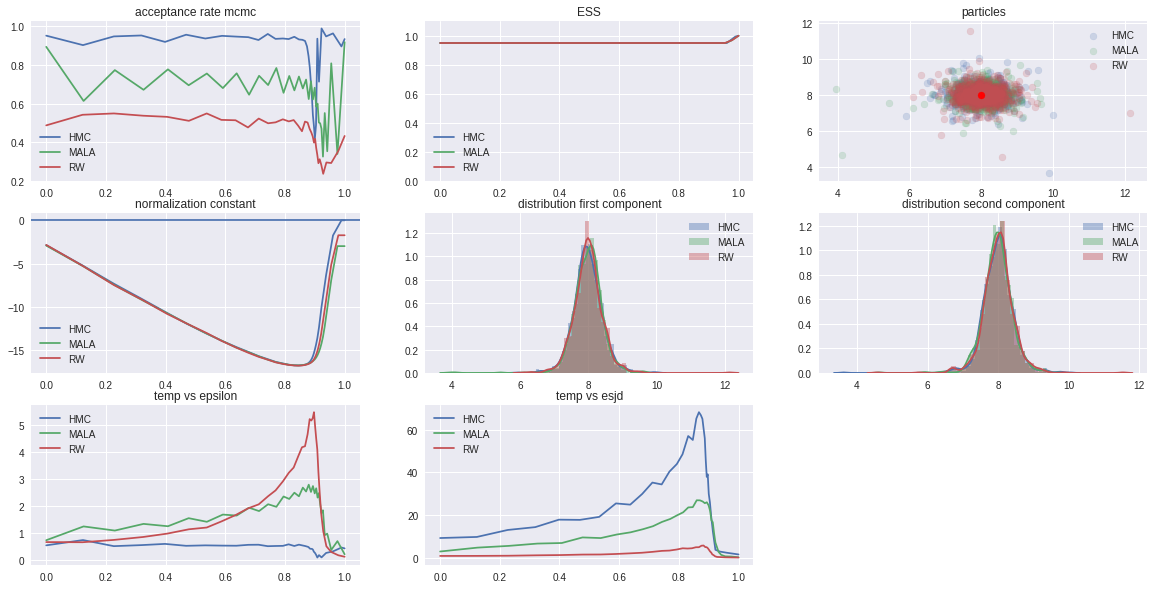

In [3]:
# sample and compare the results
res_dict_hmc = smc_sampler(temperedist,  parameters, hmcdict)
res_dict_mala = smc_sampler(temperedist,  parameters, maladict)
res_dict_rw = smc_sampler(temperedist,  parameters, rwdict)
from smc_sampler_functions.functions_smc_plotting import plot_results_single_simulation
plot_results_single_simulation([res_dict_hmc, res_dict_mala, res_dict_rw])


In [ ]:
plot_results_single_simulation([res_dict_hmc, res_dict_mala, res_dict_rw])

### Repeated samling in order to compare the performance

In [5]:
from smc_sampler_functions.functions_smc_main import repeat_sampling
samplers_list_dict = [hmcdict, maladict, rwdict]
res_repeated_sampling, first_iteration_results = repeat_sampling(samplers_list_dict, temperedist,  parameters, M_num_repetions=50)

repetition 0 of 50
Now runing smc sampler with HMC kernel
Sampler ended at time 35 after 20.8099660873 seconds 

Now runing smc sampler with MALA kernel
Sampler ended at time 35 after 3.35822916031 seconds 

Now runing smc sampler with RW kernel
Sampler ended at time 36 after 4.67297792435 seconds 

repetition 1 of 50
Now runing smc sampler with HMC kernel
Sampler ended at time 34 after 20.3656711578 seconds 

Now runing smc sampler with MALA kernel
Sampler ended at time 35 after 3.47766780853 seconds 

Now runing smc sampler with RW kernel
Sampler ended at time 35 after 4.90103292465 seconds 

repetition 2 of 50
Now runing smc sampler with HMC kernel


KeyboardInterrupt: 

### Plot the results

In [ ]:
from functions_smc_plotting import plot_repeated_simulations
plot_repeated_simulations(res_repeated_sampling)